In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# %pip install scikit-learn
from sklearn.model_selection import train_test_split
from pathlib import Path
# %pip install matplotlib
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import random
from PIL import Image


In [2]:
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
import os
from pathlib import Path

In [4]:
pixel = 27

In [5]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(directory='./Dataset for CA1 part A - AY2425S1/train', color_mode='grayscale', batch_size=100000, image_size=(pixel, pixel))

Found 9043 files belonging to 15 classes.


In [6]:
for x, y in train_data:
    X_train = x
    y_train = y

X_train = X_train/255
y_train = to_categorical(y_train, 15)

In [7]:
ROOT_DIR = Path("./Dataset for CA1 part A - AY2425S1")
SUB_FOLDERS = ['test','train','validation']
CLASSES = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

In [11]:
print(X_train)

tf.Tensor(
[[[[0.7933188 ]
   [0.5321754 ]
   [0.41489008]
   ...
   [0.5694787 ]
   [0.5152586 ]
   [0.36862746]]

  [[0.77806824]
   [0.5474946 ]
   [0.5250746 ]
   ...
   [0.63928413]
   [0.5283345 ]
   [0.35410312]]

  [[0.7814398 ]
   [0.53040016]
   [0.5825829 ]
   ...
   [0.5277575 ]
   [0.4974582 ]
   [0.37029773]]

  ...

  [[0.6059133 ]
   [0.60882753]
   [0.4259354 ]
   ...
   [0.7550621 ]
   [0.68013394]
   [0.5483876 ]]

  [[0.54996777]
   [0.58928835]
   [0.4852821 ]
   ...
   [0.65454686]
   [0.51738065]
   [0.50761324]]

  [[0.49753082]
   [0.45194063]
   [0.35357323]
   ...
   [0.59339124]
   [0.4181594 ]
   [0.5880174 ]]]


 [[[0.02607117]
   [0.06092956]
   [0.12661044]
   ...
   [0.28873304]
   [0.14329048]
   [0.22016193]]

  [[0.21893004]
   [0.18978456]
   [0.13507624]
   ...
   [0.16751796]
   [0.14204793]
   [0.06514564]]

  [[0.15177919]
   [0.13873963]
   [0.17220475]
   ...
   [0.15294118]
   [0.15758894]
   [0.1662    ]]

  ...

  [[0.29156476]
   [0.425086

In [ ]:
data_list = []

for subfol in SUB_FOLDERS:
    print(f'{subfol.upper()}:')
    
    for cls in CLASSES:
        folder_path = ROOT_DIR / subfol / cls
        
        # Check if the folder exists
        if os.path.exists(folder_path):
            num_images = len(os.listdir(folder_path))
            print(f'- {cls}: {num_images} Images')
            data_list.append({'Class': cls, 'Subset': subfol, 'NumImages': num_images})
        else:
            print(f'- {cls}: Directory Dosent exsist.')


TEST:
- Bean: 200 Images
- Bitter_Gourd: 200 Images
- Bottle_Gourd: 200 Images
- Brinjal: 200 Images
- Broccoli: 200 Images
- Cabbage: 200 Images
- Capsicum: 200 Images
- Carrot: 200 Images
- Cauliflower: 200 Images
- Cucumber: 200 Images
- Papaya: 200 Images
- Potato: 200 Images
- Pumpkin: 200 Images
- Radish: 200 Images
- Tomato: 200 Images
TRAIN:
- Bean: 795 Images
- Bitter_Gourd: 720 Images
- Bottle_Gourd: 441 Images
- Brinjal: 868 Images
- Broccoli: 750 Images
- Cabbage: 503 Images
- Capsicum: 351 Images
- Carrot: 256 Images
- Cauliflower: 587 Images
- Cucumber: 812 Images
- Papaya: 566 Images
- Potato: 377 Images
- Pumpkin: 814 Images
- Radish: 248 Images
- Tomato: 955 Images
VALIDATION:
- Bean: 200 Images
- Bitter_Gourd: 200 Images
- Bottle_Gourd: 200 Images
- Brinjal: 200 Images
- Broccoli: 200 Images
- Cabbage: 200 Images
- Capsicum: 200 Images
- Carrot: 200 Images
- Cauliflower: 200 Images
- Cucumber: 200 Images
- Papaya: 200 Images
- Potato: 200 Images
- Pumpkin: 200 Images


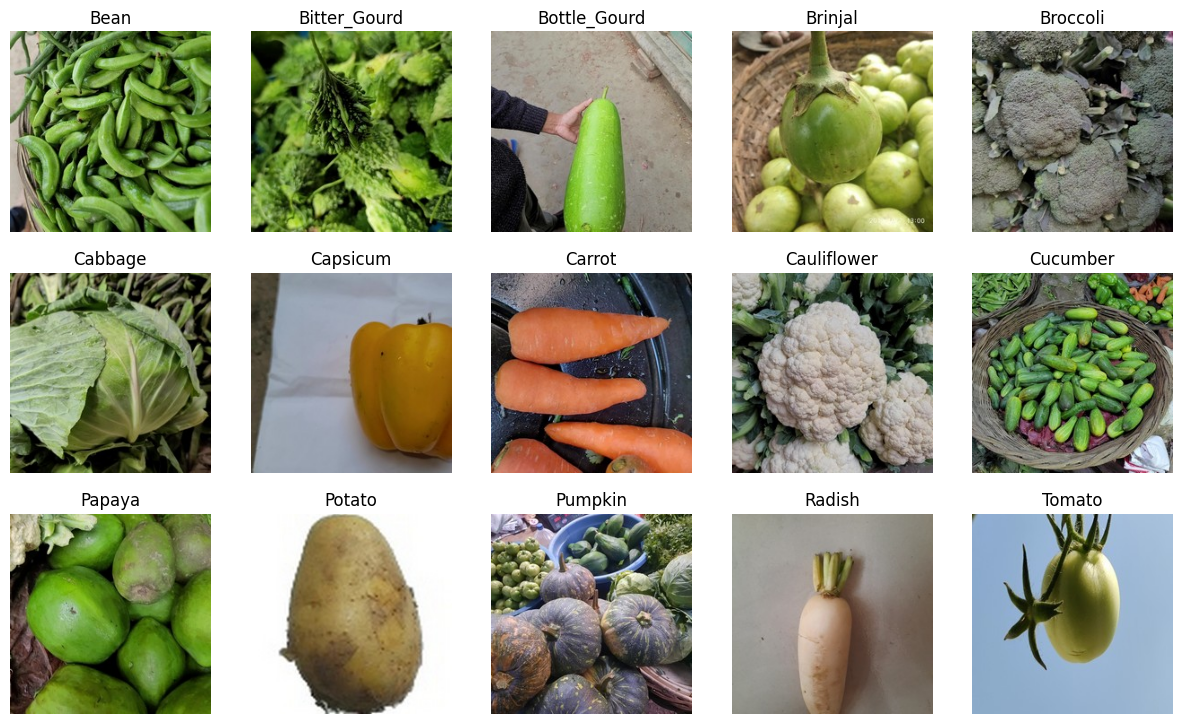

In [ ]:
def display_random_images(root_dir, subset, num_rows=4, num_cols=5):
    class_dirs = os.listdir(Path(root_dir) / subset)

    plt.figure(figsize=(15, 12))

    for i, cls in enumerate(class_dirs):
        file_paths = glob.glob(f'{root_dir}/{subset}/{cls}/*')
        img_path = random.choice(file_paths)
        img = Image.open(img_path)

        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.title(f'{cls}')
        plt.axis("off")

    plt.show()

display_random_images(ROOT_DIR, subset='train')

In [ ]:
IMG_SIZE = (28, 28, 1)

In [ ]:
import cv2 as cv2
import numpy as np

def convert_to_grayscale(images):
    gray_images = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray)
        
    gray_images = np.array(gray_images)
    gray_images = gray_images.reshape(-1,160,160,1)
    return gray_images

# Convert training and testing images to grayscale
train_gray = convert_to_grayscale(train_original)
test_gray = convert_to_grayscale(test_original)

NameError: name 'train_original' is not defined